# Analyzing the National UFO Reporting Center's Database


In [2]:
%%html
<img src="images/panda_ufo.png">

In [35]:
import pandas as pd
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Souvenir'  # The font from the original A&D manuals!
mpl.rcParams.update(
    {'font.size': 12, 'lines.linewidth': 2, 'lines.markersize': 5}
    )
%matplotlib inline

First of all, you should _always_, whenever possible, have a quick look at the data before importing it, with a text editor, database tool, etc.:


 date_time,year,month,city,state,shape,duration,posted,url
 8/30/18 22:00,2018,08,Morehead City,NC,Unknown,1 hour,8/31/18,http://www.nuforc.org/webreports/142/S142925.html
 8/30/18 21:36,2018,08,Commerce,GA,Circle,5 seconds,8/31/18,http://www.nuforc.org/webreports/142/S142924.html
 8/30/18 21:15,2018,08,Queens Village,NY,Light,15 minutes,8/31/18,http://www.nuforc.org/webreports/142/S142929.html

I prefer the excellent file pager, `less`, which is perfect for examining large files.

### Importing data
Importing with pandas is very easy. We have stored our UFO Reports data in a
Comma Separated Variable (CSV) file.

In [4]:
ufo_df = pd.read_csv("national_ufo_reports.csv")

As a naming convention, we often put a _df at the end of a variable name to remind us that it is a DataFrame object. Recall a DataFrame is a collection of
Series objects. For a wide format, it is helpful to think of each column as a variable and each row as an observation. It is a simple matter to interrogate
the first few elements using the `.head()` method associated with pandas DataFrames:

In [5]:
ufo_df.head(5)

,date_time,year,month,city,state,shape,duration,posted,url
0,8/30/18 22:00,2018,8,Morehead City,NC,Unknown,1 hour,8/31/18,http://www.nuforc.org/webreports/142/S142925.html
1,8/30/18 21:36,2018,8,Commerce,GA,Circle,5 seconds,8/31/18,http://www.nuforc.org/webreports/142/S142924.html
2,8/30/18 21:15,2018,8,Queens Village,NY,Light,15 minutes,8/31/18,http://www.nuforc.org/webreports/142/S142929.html
3,8/30/18 20:48,2018,8,Independence,KS,Unknown,3 minutes,8/31/18,http://www.nuforc.org/webreports/142/S142928.html
4,8/30/18 20:25,2018,8,Redding,CA,Light,5 seconds,8/31/18,http://www.nuforc.org/webreports/142/S142926.html


Note the row indices (here, 0 - 5) and column labels ('date_time' - 'url'). We can easily call any given element. We can look at the Series from any column by directly calling it with `[]` (note the use of `.head()` here to suppress the otherwise large number of rows):

In [6]:
ufo_df['date_time'].head()  # Note the default for .head() is the first five rows.

0    8/30/18 22:00
1    8/30/18 21:36
2    8/30/18 21:15
3    8/30/18 20:48
4    8/30/18 20:25
Name: date_time, dtype: object

We could look at the fourth row (index of 3 because, as usual, we index from 0):

In [7]:
ufo_df.loc[3]

date_time                                        8/30/18 20:48
year                                                      2018
month                                                        8
city                                              Independence
state                                                       KS
shape                                                  Unknown
duration                                             3 minutes
posted                                                 8/31/18
url          http://www.nuforc.org/webreports/142/S142928.html
Name: 3, dtype: object

Because the head of a data file tends to have localized observations, it often pays to take a random sample of a DataFrame, to better gauge the general variability of the dataset. To take five such random samples:

In [8]:
ufo_df.sample(5)

,date_time,year,month,city,state,shape,duration,posted,url
113597,6/25/69 00:00,1969,6,Moline,IL,Unknown,15 minutes,10/25/11,http://www.nuforc.org/webreports/084/S84657.html
59027,2/2/09 18:35,2009,2,Duarte,CA,Light,1 minute,3/19/09,http://www.nuforc.org/webreports/068/S68411.html
81133,8/23/04 23:00,2004,8,Caransebes (Romania),NaN,Fireball,60 sec,9/9/04,http://www.nuforc.org/webreports/039/S39107.html
67325,6/7/07 00:00,2007,6,Locust Grove,GA,Cigar,2-3 minutes,11/21/10,http://www.nuforc.org/webreports/078/S78189.html
63757,3/11/08 10:00,2008,3,Upper Saddle River (Woodcliff Lake),NJ,Fireball,4 SECONDS,3/31/08,http://www.nuforc.org/webreports/062/S62180.html


Notice that pandas has sensible defaults for displaying large datasets. Here, not all nine rows would fit on the screen and are thus truncated.

What if you want to look at a specific range ('slice') in your DataFrame?

In [9]:
ufo_df.loc[0:4, 'duration':'url']

,duration,posted,url
0,1 hour,8/31/18,http://www.nuforc.org/webreports/142/S142925.html
1,5 seconds,8/31/18,http://www.nuforc.org/webreports/142/S142924.html
2,15 minutes,8/31/18,http://www.nuforc.org/webreports/142/S142929.html
3,3 minutes,8/31/18,http://www.nuforc.org/webreports/142/S142928.html
4,5 seconds,8/31/18,http://www.nuforc.org/webreports/142/S142926.html


**NOTE:** If you look in the help documentation ( `help(pd.DataFrame.loc)` ): "note that contrary to usual python slices, **both** the start and the stop are included!"

If you prefer to use numbers instead of labels, use `.iloc[]` instead:

In [10]:
ufo_df.iloc[0:5, 6:9]

,duration,posted,url
0,1 hour,8/31/18,http://www.nuforc.org/webreports/142/S142925.html
1,5 seconds,8/31/18,http://www.nuforc.org/webreports/142/S142924.html
2,15 minutes,8/31/18,http://www.nuforc.org/webreports/142/S142929.html
3,3 minutes,8/31/18,http://www.nuforc.org/webreports/142/S142928.html
4,5 seconds,8/31/18,http://www.nuforc.org/webreports/142/S142926.html


Confusingly, `.iloc[]` slices the conventional way. Also note, for both slicing methods, square brackets [] are used instead of parentheses ().

## Exploratory Data Analysis
The following are very typical steps for Exploratory Data Analysis (EDA) of a dataset once the data are imported.

What are the dimensions of the DataFrame?

In [13]:
ufo_df.shape 

(115877, 9)

_i.e._ around 116,000 rows and 9 columns

We could just as easily found the number of rows by using our base Python `len()` function:

In [14]:
len(ufo_df)

115877

What sort of data is each column?

In [15]:
ufo_df.dtypes

date_time    object
year          int64
month         int64
city         object
state        object
shape        object
duration     object
posted       object
url          object
dtype: object

Confusingly, 'object' here refers to strings as well as other possible objects.

How do the numeric data vary (range, median, mean)?

In [16]:
ufo_df.describe()

,year,month
count,115877.000000,115877.000000
mean,2006.127687,6.850945
std,11.481973,3.216381
min,1400.000000,1.000000
25%,2003.000000,4.000000
50%,2009.000000,7.000000
75%,2013.000000,9.000000
max,2018.000000,12.000000


Half of all observations in this dataset (up to August 2018) were from 2009 until now. We'll investigate this later.

How much data is missing?

In [18]:
ufo_df.isnull().sum() 

date_time       0
year            0
month           0
city          227
state        8438
shape        3686
duration     3896
posted          0
url             0
dtype: int64

Note the chaining of methods. This powerful concept will be used throughout the remainder of this.

So none of the date-like entries are missing, as too for the URLs. The duration and shape may not
be well defined or known, so the ~4,000 missing for each is understandable, at
3% of the observations. The state is not defined
for most non-US entries, and there are plenty of those. In this rare case, there is
no need for imputation (A fancy, ten-dollar, word for 'figuring out how to handle missing
data'; it has the same Latin roots as for input, and is similar to that
for amputation (which is roughly 'to clean by cutting back'))!

## Filtering
Do we need to filter by year? The dates prior to 1900 are likely to be based on heavy, retrospective, speculation, or worse: errors due to data entry!

We can easily filter the 'year' field:

In [19]:
ufo_df[ufo_df['year'] < 1900].count()

date_time    24
year         24
month        24
city         24
state        16
shape        17
duration     17
posted       24
url          24
dtype: int64

There is also the `.query()` method to acheive a similar effect

In [21]:
ufo_df.query('year<1900').count()

date_time    24
year         24
month        24
city         24
state        16
shape        17
duration     17
posted       24
url          24
dtype: int64

There are only 24 such observations.

Upon manually checking, only three of these entries are mis-entered!
For example, one entry, http://www.nuforc.org/webreports/133/S133812.html, was dated as the year 1721, when it was obviously a replication of the time (21:30) with the yy year format (17, for 2017). This is unexpectedly nice data!

Let's remove the bad dates. We can create a tiny DataFrame:

In [22]:
bad_dates = ufo_df[ufo_df['year'].isin([1617, 1615, 1721])]

These have indices [115875,115872,115871]:

In [23]:
bad_dates.index

Int64Index([115871, 115872, 115875], dtype='int64')

You can drop these manually:

In [24]:
ufo_df = ufo_df.drop([115875, 115872, 115871])

...or you could have indexed from the bad_dates DataFrame (note the `.drop()` method has a convenient 'inplace' option):

In [ ]:
ufo_df.drop(index=bad_dates.index, inplace=True)

Whenever you perform data wrangling and cleaning, it pays to check you performed the operation correctly.

In [25]:
ufo_df.shape

(115874, 9)

In [ ]:
OK, good. Three fewer rows, correct number of columns.

## Dates and TimeSeries
As with most analysis frameworks, dates are a special class unto themselves.
This is because everyone has a different way of writing them (for example, a European may write 5 March 1953 as 5/3/1953, while an American might write
5/3/1953), and there are so many things you want to do with them. Here, we explicitly force the 'date_time' column to be a DateTime object:

In [26]:
ufo_df['date_time'] = pd.to_datetime(ufo_df['date_time'])

Check the output format:

In [27]:
ufo_df.dtypes[0:4]

date_time    datetime64[ns]
year                  int64
month                 int64
city                 object
dtype: object

**NOTE:** This makes use of the default format specifications, including `dayfirst=False` and `yearfirst=False`. This is because the database follows the American convention.

If we already expect a date format upon import, there is an option to specify a date-time column, so we could have done this initially, _e.g._:

In [ ]:
ufo_df = pd.read_csv("national_ufo_reports.csv", parse_dates=[0], keep_date_col=True, infer_datetime_format=True)

However, this particular dataset is tricky!
The form to input an observation date only allows a two-digit year (yy). So it can't unambiguously infer what century an event happened! Thankfully the URL itself encodes the full four-digit year (yyyy) as well as the month (mm).
The dataset we use has already parsed the 'proper' year and month from this metadata already, because we had anticipated this very issue (see the description on the Spider used to obtain this data from the NUFORC website).

We could construct an accurate event date field by assuming the correct day is entered in the 'event_time' field. Then, extract only the 'day' information as
another column:

In [28]:
ufo_df['day'] = [x.day for x in ufo_df['date_time']]

We can then concatenate the year, month and day Series as a single datetime Series...

...with the following caveat:
From https://pandas-docs.github.io/pandas-docs-travis/timeseries.html:
"Since pandas represents timestamps in nanosecond resolution, the time span that can be represented using a 64-bit integer is limited to approximately 584 years"

In [29]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

So we'll have to filter for dates after the year 1677 before we convert:

In [30]:
ufo_df['event_time'] = pd.to_datetime(ufo_df[ufo_df['year'] > 1678].loc[:,['year','month','day']])

In [31]:
ufo_df['event_time'].dtype

dtype('<M8[ns]')

In [32]:
ufo_df['event_time'].min()

Timestamp('1762-12-11 00:00:00')

In [33]:
ufo_df['event_time'].max()

Timestamp('2018-08-30 00:00:00')

## Graphical analysis.
Pandas has support for a wide range of graphical analysis. Effectively there are a number of wrappers to the matplotlib Python library.

Let's analyze the univariate distribution of observations by month:

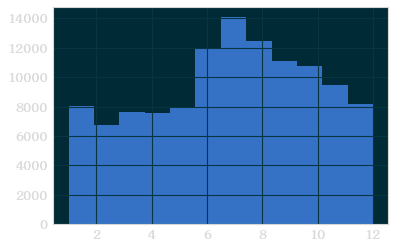

In [36]:
ufo_df['month'].hist(bins=12)

Recall that the plotting functions are wrappers for matplotlib, so you can add attributes to the figures accordingly:

Text(0.5,1,'Distribution of UFO reports by month')

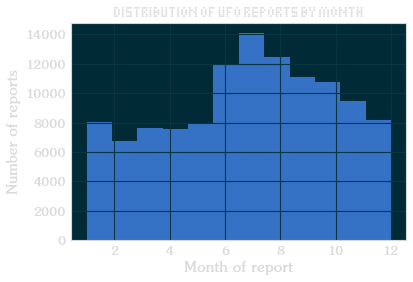

In [38]:
import matplotlib.pyplot as plt

ufo_df['month'].hist(bins=12)

plt.xlabel("Month of report")
plt.ylabel("Number of reports")
plt.title("Distribution of UFO reports by month", fontname="Alien Invasion", fontsize=16)

# If you want to save the figure:
#plt.savefig("UFO_observations_by_month.png")

Or you could examine it interactively with:

In [ ]:
plt.show()

but note that the object is 'used' up by saving or displaying.

It appears that summer (in the Northern Hemisphere) is the time to spot UFOs.
Who would have thought?

## Effect of smart-phones
Does the introduction of so-called smart phones (I think mine is a 'dumb phone') have anything to do with the rate of sightings?

We will have to aggregate over year and count the number of occurences. We do this aggregation with the `.groupby()` operation.

Text(0.5,1,'Increase in UFO reports over time')

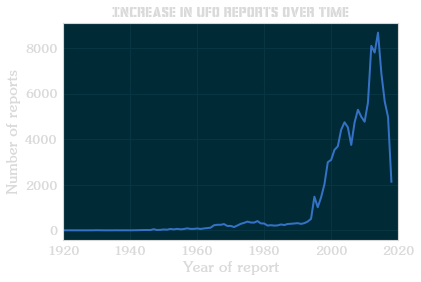

In [39]:
ufo_df.groupby('year')['posted'].count().reset_index().plot(x='year', y='posted', xlim=[1920.0, 2020.0], legend=False)
plt.xlabel("Year of report")
plt.ylabel("Number of reports")
plt.title("Increase in UFO reports over time", fontname="Covert Ops", fontsize=16)

The smart phone was introduced around the middle of 2007 (more or less)

Text(0.5,1,'Effect of technology on reports by month')

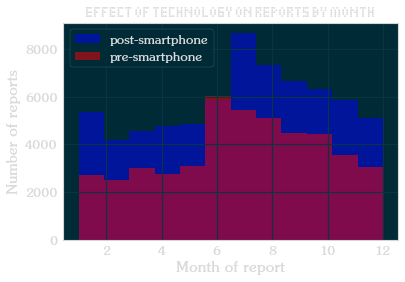

In [42]:
ufo_df['smartphone_epoch'] = ['pre-smartphone' if x < 2007 else 'post-smartphone' for x in ufo_df['year']]

ufo_df[ufo_df['smartphone_epoch'] == 'post-smartphone']['month'].plot.hist(bins=12, color='blue', alpha=0.5, label="post-smartphone", legend=True)
ufo_df[ufo_df['smartphone_epoch'] == 'pre-smartphone']['month'].plot.hist(bins=12, color='red', alpha=0.5, label="pre-smartphone", legend=True)

plt.xlabel("Month of report")
plt.ylabel("Number of reports")
plt.title("Effect of technology on reports by month", fontname="Alien Invasion", fontsize=16)

Because the plot is really a matplotlib object, you could also have obtained
the legend by calling it directly, _i.e._: `plt.legend()`

Have a look at the univariate statistics of the UFO shape

Text(0.5,1,'Reported UFO shape')

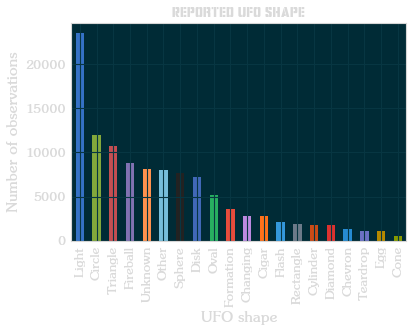

In [43]:
ufo_df.groupby('shape')['posted'].count().sort_values(ascending=False).head(20).plot.bar()
plt.xlabel("UFO shape")
plt.ylabel("Number of observations")
plt.title("Reported UFO shape", fontname="Covert Ops", fontsize=16)

So by far the majority of shapes were 'lights'.

## What cities saw the most UFOs?

### Further data cleaning
Often in the EDA phase, it becomes clear that further cleaning is required. This
is the case here!

Recall we noted that there were 227 cities missing. This hasn't been a problem until now, because we didn't care about the city names. There are quite a few tasks required to clean up the city names. 

For example, there are many entries that attempt to clarify or condition with commentary in parentheses:

In [65]:
ufo_df.dropna()[ufo_df['city'].dropna().str.contains("\)$")].loc[:, 'date_time':'city'].sample(5)

/home/ra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date_time,year,month,city
84925,2003-12-03 16:45:00,2003,12,Vernon (Canada)
107704,1991-05-05 20:30:00,1991,5,Grants (southeast of)
75830,2005-07-27 08:00:00,2005,7,Columbia (near)
92873,2001-04-24 08:00:00,2001,4,London (Ontario) (Canada)
58222,2009-04-10 00:20:00,2009,4,Tabusintac (Canada)


(Note the use of vectorized string methods and string matching using regular expressions -- the `\)$` means "look for a `)` at the very end of the string")

There are

In [66]:
ufo_df.dropna()[ufo_df['city'].dropna().str.contains("\)$")].count()[0]

/home/ra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


8673

8,673 of these observations!

(Note the double use of .dropna() to prevent data misalignment (this is enforced by pandas, so you'll get an error if data threatens to become misaligned)).

Including this mysterious gem:

`((town name temporarily deleted)), OK` 

http://www.nuforc.org/webreports/013/S13977.html

Now _this_ is the kind of thing we came here for!

First we'll get rid of them no-good city NaNs: `.dropna()` has some helpful parameters to specify rows/columns and in-place filtering.

In [67]:
ufo_df.dropna(subset=['city'], inplace=True)

Perhaps we could split the city strings by " (" and retain the 0th element:

In [68]:
ufo_df[ufo_df['city'] == 'New York'].count()

date_time           24
year                24
month               24
city                24
state               24
shape               24
duration            23
posted              24
url                 24
day                 24
event_time          24
smartphone_epoch    24
dtype: int64

`ufo_df['city'] = ufo_df['city'].str.split(sep=" (")[0]` 
Unfortunately pandas' `str.split` method does not have the rich support of the base
`str.split()` method.

While we are at it, there are a few entries that have non-standard capitalization (such as 'AmArillo'), we we enforce this with .title():

In [69]:
ufo_df['city'] = [x.title().split(sep=" (")[0] for x in ufo_df['city']]

There are still 20 cities with parentheses, and at least one with '{'s. I was hoping it wouldn't come to this...

...but we're going to have to take a brief dip into the world of regular expressions (regex):

In [70]:
import re

Remove anything following a [, ( or {:

In [71]:
ufo_df['city'] = [re.split("\s*[\(\{]", x.title())[0] for x in ufo_df['city']]

Check nothing went awry (as sometimes occurs with regex's!)

In [72]:
ufo_df.dropna()[ufo_df['city'].dropna().str.contains("\)$|\(")]

/home/ra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date_time,year,month,city,state,shape,duration,posted,url,day,event_time,smartphone_epoch
25404,2014-04-07 21:05:00,2014,4,"Iowa City Hwy 218 North, I-380 North, Cedar Ra...",IA,Other,50 minutes,4/11/14,http://www.nuforc.org/webreports/108/S108434.html,7,2014-04-07,post-smartphone


There are only two entries with (these types of) entry errors left! We can manually impute them:

In [73]:
ufo_df.loc[115268, 'city'] = 'Aliquippa'  # The largest 'city' in Beaver County, PA
ufo_df.loc[25404, 'city'] = 'Cedar Rapids'

ufo_df[ufo_df['city'].str.contains("New York")]['city'].unique()

array(['New York City', 'New York', 'New York Mills', 'West New York',
       'New York State Thruway / Catskill', 'New York City, Manhattan',
       'New York City/Far Rockaway', 'New York City/Staten Island',
       'New York City/Philadelphia', 'New York/Philadelphia',
       'New York City/Central Park', 'New York/San Francisco',
       'Central New York', 'East New York', 'New York Worlds Fair'],
      dtype=object)

There are plenty of locations that are between main population centers, often separated by a '/' or a '&'. Most cases, the larger settlement is on the left of the slash or ampersand.

In [74]:
ufo_df['city'] = [re.sub("\s*/.*", "", x.title()) for x in ufo_df['city']]
ufo_df['city'] = [re.sub("\s*&.*", "", x.title()) for x in ufo_df['city']]
ufo_df['city'] = [re.sub("^[Bb]etween", ",", x.title()) for x in ufo_df['city']]

Check. Check. **CHECK.** _Always_ check!

In [75]:
ufo_df[ufo_df['city'].str.contains("New York")]['city'].unique()

array(['New York City', 'New York', 'New York Mills', 'West New York',
       'New York State Thruway', 'New York City, Manhattan',
       'Central New York', 'East New York', 'New York Worlds Fair'],
      dtype=object)

Looks good. Mostly.

#### TEST EFFECT OF NOT INCLUDING ALL THE VARIANTS OF NEW YORK

In [78]:
uniq_ny = ufo_df[ufo_df['city'].str.contains("New York")]['city'].unique()
for uniq in uniq_ny:
    ufo_df[ufo_df['city'] == uniq]['city'].count()

In [ ]:
731
29
4
6
1
1
1
1
1

SO NOT VERY MUCH (29/731 = 4%)

#### Create function based on this, taking in city name

In [79]:
def getUniqueSimilarCities(df, city_name):
    """docstring for getUniqueSimilarCities"""
    uniq_list = df[df['city'].str.contains(city_name)]['city'].unique()
    name_count = []
    for uniq in uniq_list:
        name_count.append((uniq, df[df['city'] == uniq]['city'].count()))
    return name_count

In [ ]:
def getUniqueSimilarCities(df, city_name):
    """docstring for getUniqueSimilarCities"""
    uniq_list = df[df['city'].str.contains(city_name)]['city'].unique()
    count_df = pd.DataFrame(uniq_list, columns=['city'])
    name_count = []
    for uniq in uniq_list:
        name_count.append(df[df['city'] == uniq]['city'].count())
    count_df['count'] = name_count
    return count_df.sort_values('count', ascending=False)


counter = 0
for Idx in city_pop['city'].head(100).tail(50):
    Z = getUniqueSimilarCities(ufo_df, Idx)
    fraction_remainder = Z['count'][1:].sum()/Z['count'].sum()
    fraction_secondary = 1 - Z['count'][0:2].sum()/Z['count'].sum()
    if fraction_remainder > 0.05:
        counter += 1
        print(
            "{0} City: {1} Fraction of similar city names {2:.2%};\
            fraction of primary and secondary only {3:.2%}".format(
                counter, Z['city'][0], fraction_remainder, fraction_secondary)
        )

#getUniqueSimilarCities(ufo_df, "Chicago")

In [80]:
def purgeDirectionalModifiers(df, city_name):
    """Strip off directional prefixes North, South etc. from city names in DataFrame df"""
    direction_list = ["North", "N.", "East", "E.", "South", "S.", "West", "W."]
    direction_regex = re.compile(' |'.join(direction_list) + ' ')
    match_idx = df['city'].str.contains(city_name).index
    df['city'].loc[match_idx] = [re.sub(direction_regex, "", x) for x in df['city'].loc[match_idx]]


def purgeCitySuffix(df, city_name):
    """Strip specifiers for city, county etc."""
    suffix_list = ["City", "County", "Area", "Bay", "Airport", "D.C.", "Dc", ","]
    suffix_regex = re.compile(' ' + '$| '.join(suffix_list) + "$")
    match_idx = df['city'].str.contains(city_name).index
    df['city'].loc[match_idx] = [re.sub(suffix_regex, "", x) for x in df['city'].loc[match_idx]]


cities_to_clean = ["Sacramento", "Seattle", "Milwaukee", "Baltimore",
                   "Las Vegas", "Boston", "San Francisco", "Washington",
                   "Chicago", "Los Angeles", "New York"]

for city in cities_to_clean:
    purgeDirectionalModifiers(ufo_df, city)
    purgeCitySuffix(ufo_df, city)

/home/ra/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


How many cities are there in this data set?

In [82]:
len(ufo_df['city'].unique())

18366

The US cities aren't uniquely specified; we need to add their US state:

Text(0.5,1,'UFO reports by city')

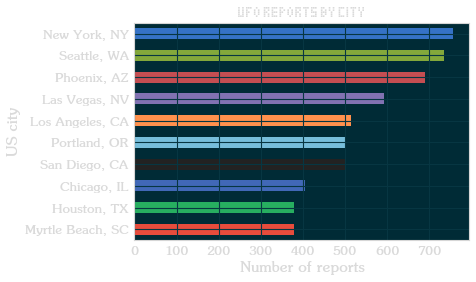

In [83]:
ufo_df['city'] = ufo_df['city'] + ', ' + ufo_df['state']

ufo_df.groupby('city')['posted'].count().sort_values(ascending=False).head(10).plot.barh()
plt.gca().invert_yaxis()
plt.ylabel("US city")
plt.xlabel("Number of reports")
plt.title("UFO reports by city", fontname="Alien Invasion", fontsize=16)

How about the observations per capita? We'll need more data.

The US census bureau for the 770 most populous cities: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml

However, there are far too many columns for our needs.

In [84]:
city_pop = pd.read_csv("PEP_2017_PEPANNRSIP.US12A_with_ann.csv",
                       encoding='latin-1')

Rename the non-extraneous census-specific column labels and drop the rest:

In [85]:
city_pop = city_pop.rename(index=str, columns={'GC_RANK.rank-label': 'rank', 'GC_RANK.display-label.1': 'city_state', 'respop72017': 'pop'})
city_pop = city_pop[['rank', 'city_state', 'pop']]

Or we could have used the `.drop()` method as above.

Further cleaning:

In [87]:
city_pop['city_state'] = city_pop['city_state'].str.replace(' \(balance\)', '')  # This term means something to the Census Bureau...

There are still a few (eight) cities with hyphens or official county designations or other weirdnesses

Let's impute them manually, otherwise we'd miss out on some major cities!

In [88]:
city_pop.loc['23', 'city_state'] = "Nashville city, Tennessee"
city_pop.loc['59', 'city_state'] = "Lexington city, Kentucky"
city_pop.loc['88', 'city_state'] = "Winston city, North Carolina"
city_pop.loc['121', 'city_state'] = "Augusta city, Georgia"
city_pop.loc['171', 'city_state'] = "Macon County, Georgia"
city_pop.loc['219', 'city_state'] = "Athens County, Georgia"
city_pop.loc['28', 'city_state'] = "Louisville city, Kentucky"
city_pop.loc['55', 'city_state'] = "Honolulu city, Hawaii"

The convention is largely "X city, Y" where X is the name of the city and Y is the full name of the state. So we _could have_ split by the " city, " delimiter.
Unfortunately there are towns, cities, villages and counties in the mix. This means we have to dip briefly into the murky waters of regular expressions (regex):

In [89]:
city_delimiter = ' [Cc]ity, '
city_delimiter += '| town, '  # Note the pipe operator '|', used as logical OR
city_delimiter += '| [Cc]ounty, '
city_delimiter += '| village, '
city_delimiter += '| municipality, '

Now we can split the cities and states according to this delimiter:

In [90]:
city_pop['city'] = [re.split(city_delimiter, x)[0] for x in city_pop['city_state']]
city_pop['state'] = [re.split(city_delimiter, x)[-1] for x in city_pop['city_state']]

A fun aside: how many cities have the same name in the US?

In [91]:
city_pop.groupby('city').count().sort_values('state', ascending=False)['state'].head(5)

city
Springfield    5
Lakewood       4
Albany         3
Bloomington    3
Charleston     2
Name: state, dtype: int64

There are _five_ Springfields!

There are 36 major cities in the US with duplicated names. We'll need to retain the state information to disambiguate. This is why people have to specify the US state. You don't want to get on the plane to Portland, only to realize you're heading to the complete opposite coast!

Sanity check to make sure we imported fine and the data looks like it make sense:

In [92]:
city_pop.sample(n=5)

,rank,city_state,pop,city,state
162,163,"Palmdale city, California",157519,Palmdale,California
256,257,"Westminster city, Colorado",112812,Westminster,Colorado
717,718,"Lenexa city, Kansas",53553,Lenexa,Kansas
745,746,"Olympia city, Washington",51609,Olympia,Washington
198,199,"Roseville city, California",135329,Roseville,California


I created a text file with all the states' names and abbreviations, `state_abbrev.txt`:

In [95]:
state_ref = pd.read_csv("state_abbrev.txt")

Let's add the abbreviation references to the `city_pop` DataFrame

In [96]:
city_pop = city_pop.merge(state_ref, on='state', how='left')

### Prepare to be merged!
**NOTE:** by doing this, we are automatically resigning ourselves to analyzing US-only data; the following transformations make no sense if there is no associated US state.

How much data will this discard?

In [98]:
ufo_df['state'].isnull().sum()/len(ufo_df)

0.07189118610945378

So 7.2% of the entries have no defined state. By inspection, most of these are from outside of the US. This could be a follow-up investigation.

Also...

In [99]:
city_pop['pop'].min()

47929

...cities with populations of at less than 47,929 will be omitted.

Combine the city and state into one column to make merge syntax easier

In [100]:
city_pop['city_abbrev'] = city_pop['city'] + ', ' + city_pop['abbreviation']

Ugh. Now we have too many columns. We only wanted two!

In [101]:
city_pop = city_pop[['city_abbrev', 'pop']]

Let's check the ten most populous cities:

Text(0.5,1,'Ten most populous US cities')

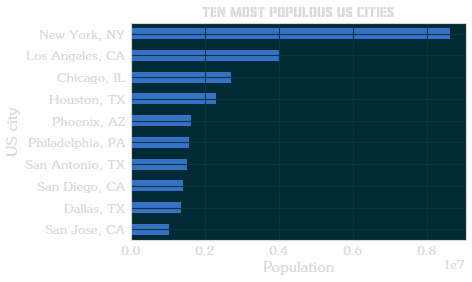

In [102]:
city_pop.sort_values('pop', ascending=False).head(10).plot.barh(x='city_abbrev', legend=False)
plt.gca().invert_yaxis()
plt.xlabel('Population')
plt.ylabel('US city')
plt.title("Ten most populous US cities", fontname="Covert Ops", fontsize=16)

Merge the city_pop references into the ufo_df DataFrame:

In [103]:
ufo_merged = ufo_df.merge(city_pop, left_on='city', right_on='city_abbrev', how='left')

Get rid of the resulting city `NaNs`:

In [104]:
ufo_merged.dropna(subset=['city'], inplace=True)

So, the cities with the most recorded UFO sightings are:

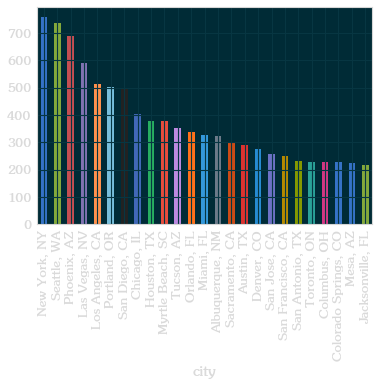

In [108]:
ufo_merged.groupby('city')['posted'].count().sort_values(ascending=False).head(25).plot.bar()

Finally, what are the cities with highest recorded UFO sightings per capita?

In [106]:
A = ufo_merged.groupby('city')['posted'].count()
A = pd.DataFrame(A)

In [107]:
A = A.join(city_pop.set_index('city_abbrev'), how='left')

A.dropna(subset=['pop'], inplace=True)
A['obs_per_1000'] = 1000*A['posted']/A['pop']

A.sort_values('obs_per_1000', ascending=False).head(25)

,posted,pop,obs_per_1000
city,,,
"Tinley Park, IL",158,56668.0,2.788170
"Sarasota, FL",111,56994.0,1.947573
"Olympia, WA",96,51609.0,1.860141
"Bellingham, WA",121,89045.0,1.358863
"Santa Fe, NM",109,83776.0,1.301089
"Pensacola, FL",68,52590.0,1.293021
"Everett, WA",141,110079.0,1.280898
"Auburn, WA",100,80776.0,1.237991
"Orlando, FL",337,280257.0,1.202468


Wow! Who would have thought that Tinley Park, Illinois would have the most UFO reports per capita? The second, Sarasota, FL, isn't even close!

Text(0.5,1,'Cities with highest UFO reports per capita')

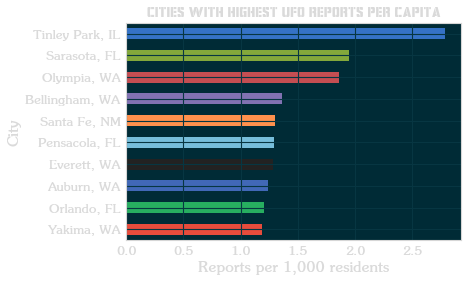

In [109]:
A.sort_values('obs_per_1000', ascending=False)['obs_per_1000'].head(10).plot.barh(legend=False)
plt.gca().invert_yaxis()
plt.ylabel("City")
plt.xlabel("Reports per 1,000 residents")
plt.title("Cities with highest UFO reports per capita", fontname="Covert Ops", fontsize=16)

What are the states with the most observations?

In [110]:
ufo_merged.groupby('state')['posted'].count().sort_values(ascending=False).head(10)

state
CA    13235
FL     6312
WA     5767
TX     4833
NY     4580
AZ     3909
PA     3784
IL     3521
OH     3470
MI     2922
Name: posted, dtype: int64

## Case studies

### The Phoenix Lights

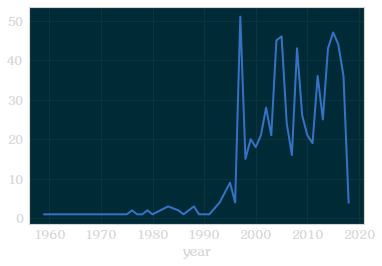

In [115]:
ufo_merged[(ufo_merged['year'] > 1910) & (ufo_merged['city']=='Phoenix, AZ')].groupby('year')['posted'].count().plot(x='year', y='posted')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb1c0149b0>]],
      dtype=object)

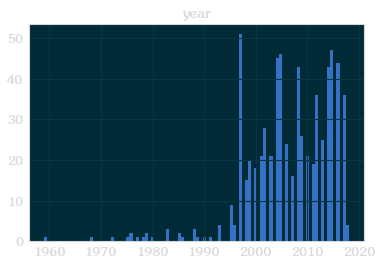

In [118]:
ufo_merged[ufo_merged['city'] == 'Phoenix, AZ'].hist('year', bins=100)

### Roswell, NM in 1947

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb1bf63208>]],
      dtype=object)

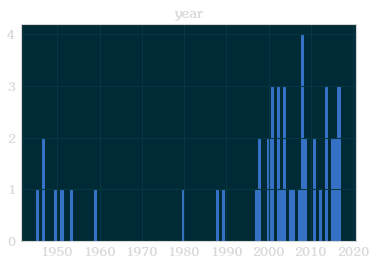

In [119]:
ufo_merged[ufo_merged['city'] == 'Roswell, NM'].hist('year', bins=100)

### Chigago O'Hare lights in 2006

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb1c096d68>]],
      dtype=object)

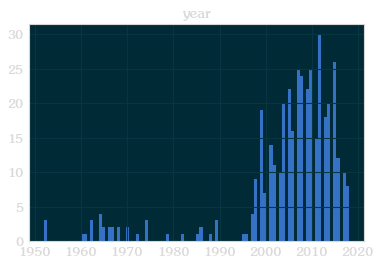

In [120]:
ufo_merged[ufo_merged['city'] == 'Chicago, IL'].hist('year', bins=100)

### Aurora, TX

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb1cd04cc0>]],
      dtype=object)

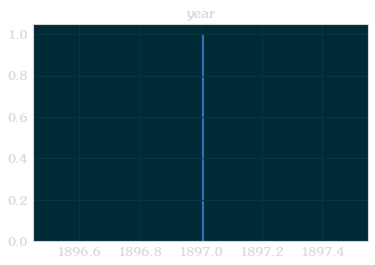

In [121]:
ufo_merged[ufo_merged['city'] == 'Aurora, TX'].hist('year', bins=100)

Ha! Just a single observation, from 1897. You didn't expect a UFO sighting from back then! The erport is quite an interesting read: http://www.nuforc.org/webreports/088/S88780.html

**Other notes:** over 720 labels of 'HOAX' in the summary pages. This would make an interesting follow-up study.